<a href="https://colab.research.google.com/github/cppel/data/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%968_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №8. Random forest**

# Задание 1. Обучите классификатор Random Forest для решения задачи бинарной классификации: для каждого человека научиться предсказывать, выживет ли он при крушении Титаника.

Ссылка на датасет: https://www.kaggle.com/c/titanic/data

## 1. Устанавливаем зависимости

In [97]:
# Ваш код

from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Импортируем датасет

In [98]:
# Ваш код



train_data = pd.read_csv("/content/drive/MyDrive/rf/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/rf/test.csv")


## 3. Производим разведовательный анализ данных


Получим представление о данных в датасете:

In [99]:
# Ваш код

train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [100]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
missing_value=train_data.isnull().sum()
missing_value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [103]:
for feature ,value in missing_value.items():
    if value!=0:
        print(feature,':' , value)

Age : 177
Cabin : 687
Embarked : 2


In [104]:
missing_value_test=test_data.isnull().sum()
missing_value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
for feature ,value in missing_value_test.items():
    if value!=0:
        print(feature,':',value)

Age : 86
Fare : 1
Cabin : 327


In [106]:
import pandas as pd

def handleMissingvalue(df):
    new_df = df.copy()  # Corrected: Added parentheses to call the copy() method

    # Fill null values in 'Age' with mean age and 'Embarked' with mode Embarked
    new_df['Age'] = new_df['Age'].fillna(new_df['Age'].mean())
    new_df['Embarked'] = new_df['Embarked'].fillna(new_df['Embarked'].mode()[0])  # Corrected: Added [0] to access the mode value

    # Median fare for each Pclass
    median_fare_by_pclass = new_df.groupby('Pclass')['Fare'].median()  # Corrected: Changed 'train_data' to 'new_df'
    new_df['Fare'] = new_df.apply(lambda row: median_fare_by_pclass[row['Pclass']] if pd.isnull(row['Fare']) else row['Fare'], axis=1)

    # Drop 'Cabin' column
    new_df = new_df.drop('Cabin', axis=1)

    return new_df

train_data_missing_handled = handleMissingvalue(train_data)

In [107]:
train_data_missing_handled.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [108]:
train_data_missing_handled = handleMissingvalue(train_data)

if sum(train_data_missing_handled.isnull().sum().tolist())==0:
    print('No Missing value')

No Missing value


In [109]:
train_data_missing_handled.duplicated().sum()

0

In [110]:
train_data_missing_handled.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [111]:
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [112]:
def outlier(feature):
    plt.figure(figsize=(8, 6))  # Set the size of the plot (optional)

# Create a box plot
    sns.boxplot(y=train_data_missing_handled[feature])

# Customize the plot (optional)
    plt.title("Box Plot")

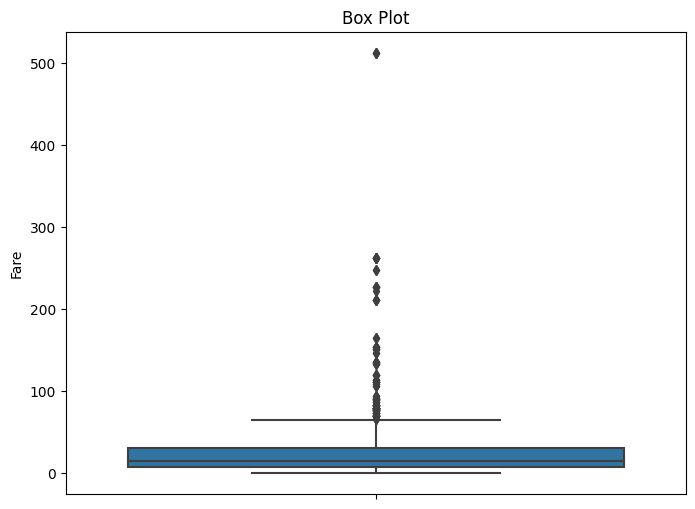

In [113]:
outlier('Fare')

In [114]:
Q1=train_data_missing_handled['Fare'].quantile(0.25)
Q3=train_data_missing_handled['Fare'].quantile(0.75)
IQR=Q3-Q1

In [115]:
# CALCULATE LOWER BOUND AND UPPER BOUND FOR OUTLIER

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [116]:
print('Lower Bound: ', lower_bound)
print('Upper Bound: ', upper_bound)

Lower Bound:  -26.724
Upper Bound:  65.6344


In [117]:
train_data_missing_handled['Fare'] = train_data_missing_handled['Fare'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

In [118]:
train_data_missing_handled['Fare']

0       7.2500
1      65.6344
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

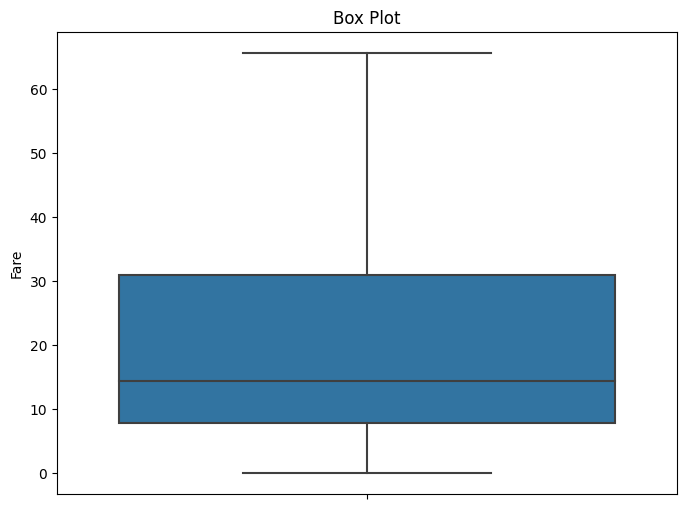

In [119]:
outlier('Fare')

In [120]:
train_dataset=train_data_missing_handled.copy()

In [121]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,24.046813
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,20.481625
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,65.634400


In [122]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [123]:
train_dataset.duplicated().sum()

0

In [124]:
train_dataset.isnull().sum().sum()

0

In [125]:
train_dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

Text(0.5, 1.0, 'Survival Distribution (pie Chart)')

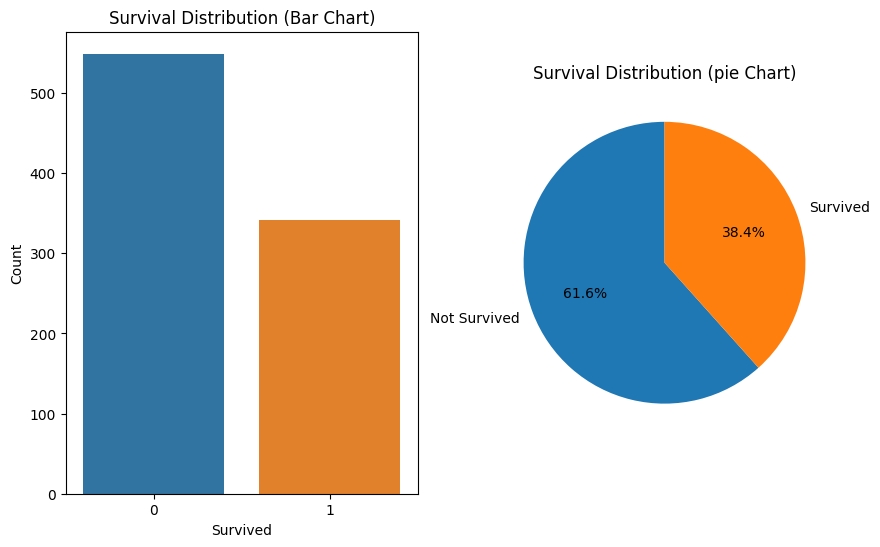

In [126]:
survival_counts=train_dataset['Survived'].value_counts()
survival_counts

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x='Survived',data=train_dataset)

plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Distribution (Bar Chart)')

# pie chart
plt.subplot(1,2,2)
plt.pie(survival_counts,labels=['Not Survived','Survived'], autopct='%1.1f%%',startangle=90)
plt.title('Survival Distribution (pie Chart)')

In [127]:
female_Survival_counts=train_dataset[train_dataset['Sex']=='female']['Survived'].value_counts()
male_Survival_counts=train_dataset[train_dataset['Sex']=='male']['Survived'].value_counts()

female_Survival_counts,male_Survival_counts

(1    233
 0     81
 Name: Survived, dtype: int64,
 0    468
 1    109
 Name: Survived, dtype: int64)

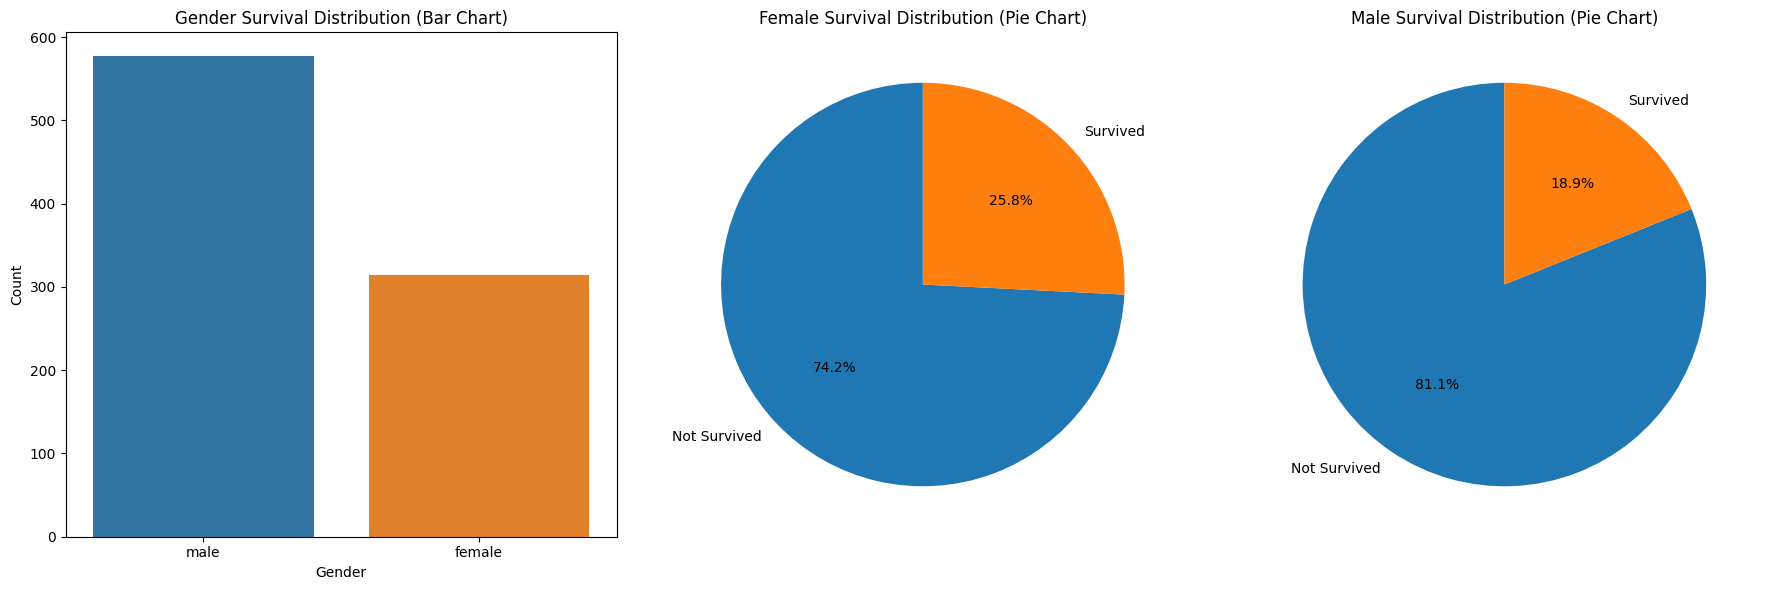

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

# First subplot: countplot for gender distribution
plt.subplot(1, 3, 1)
sns.countplot(x='Sex', data=train_dataset)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Survival Distribution (Bar Chart)')

# Assuming female_Survival_counts and male_Survival_counts are defined and contain appropriate counts
# Second subplot: pie chart for female survival distribution
plt.subplot(1, 3, 2)
plt.pie(female_Survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Female Survival Distribution (Pie Chart)')

# Third subplot: pie chart for male survival distribution
plt.subplot(1, 3, 3)
plt.pie(male_Survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Male Survival Distribution (Pie Chart)')

plt.tight_layout()
plt.show()

In [129]:
train_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,65.6344,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [130]:
age_min=train_dataset['Age'].min()
age_max=train_dataset['Age'].max()
age_min,age_max

(0.42, 80.0)

In [131]:
age_bins=age_bins = [age_min,12, 24, 36, 48, 60, age_max]
age_labels = ['0-12','13-24', '25-36', '36-48', '49-60', '61+']

train_data_modified=train_dataset.copy()

# Bins the age groups
train_data_modified['age_group']=pd.cut(train_data_modified['Age'],bins=age_bins,labels=age_labels)

In [132]:
train_data_modified.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,13-24
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C,36-48
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,25-36
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,25-36
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,25-36


<ipython-input-133-b2a30c505d45>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age_group',y='Survived',data=train_data_modified,ci=None)


Text(0.5, 1.0, 'Survival percentage vs age group')

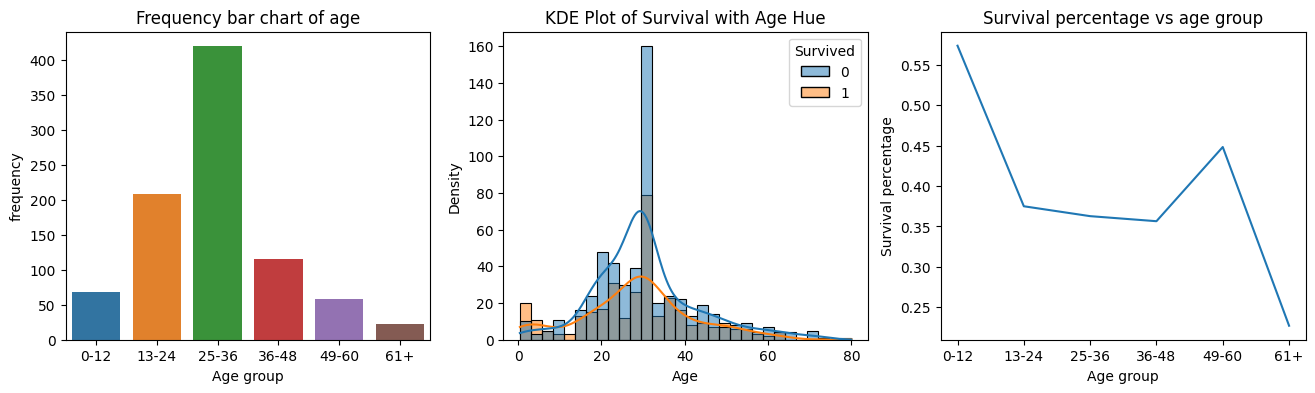

In [133]:
plt.figure(figsize=(16,4))
# Bar chart for Age frequencies
plt.subplot(1,3,1)
sns.countplot(x='age_group',data=train_data_modified)
plt.xlabel('Age group')
plt.ylabel('frequency')
plt.title('Frequency bar chart of age')

# KDE plot of survival with age as hue
plt.subplot(1,3,2)
sns.histplot(x='Age',data=train_data_modified,hue='Survived',kde=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Survival with Age Hue')


#  Line Plot representing survival percentage of each age group
plt.subplot(1,3,3)
sns.lineplot(x='age_group',y='Survived',data=train_data_modified,ci=None)
plt.xlabel('Age group')
plt.ylabel('Survival percentage')
plt.title('Survival percentage vs age group')

Text(0.5, 1.0, 'Count of Passenger class')

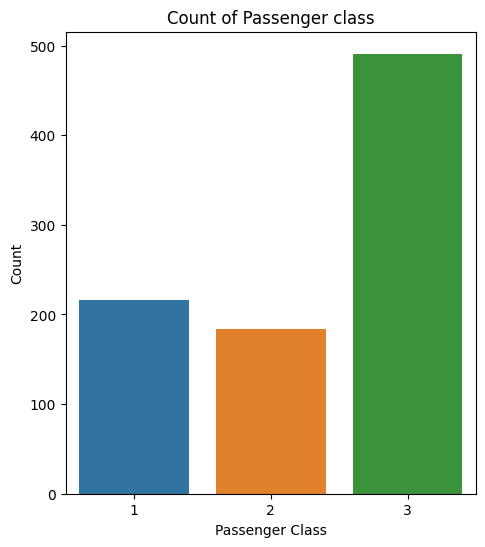

In [134]:
plt.figure(figsize=(18, 6))

# First subplot: countplot for gender distribution
plt.subplot(1, 3, 1)
sns.countplot(x='Pclass', data=train_data_modified)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Count of Passenger class')

## 5. Feature Engineering

Поработаем с признаками, выделим важные, изменим форму их представления (при надобности)

In [135]:
# Ваш код

train_data_modified.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,13-24
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C,36-48
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,25-36
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,25-36
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,25-36


In [136]:
unnecessary_column = ['PassengerId', 'Name', 'Ticket','Age']
train_data_modified.drop(unnecessary_column, axis=1,inplace=True)

In [137]:
# Rename column
train_data_modified.rename(columns={'age_group':'Age'},inplace=True)

In [138]:
train_data_modified

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,0,3,male,1,0,7.2500,S,13-24
1,1,1,female,1,0,65.6344,C,36-48
2,1,3,female,0,0,7.9250,S,25-36
3,1,1,female,1,0,53.1000,S,25-36
4,0,3,male,0,0,8.0500,S,25-36
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,25-36
887,1,1,female,0,0,30.0000,S,13-24
888,0,3,female,1,2,23.4500,S,25-36
889,1,1,male,0,0,30.0000,C,25-36


In [139]:
from sklearn.preprocessing import OneHotEncoder

In [140]:
new_df = train_data_modified.copy()
# Specify the columns to be one-hot encoded
columns_to_encode = ['Pclass', 'Sex', 'Age', 'Embarked', 'SibSp']
new_df=pd.get_dummies(new_df, columns=columns_to_encode,dtype=int)

In [141]:
# Apply min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df['Fare'] = scaler.fit_transform(new_df[['Fare']])

In [142]:
new_df

,Survived,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_0-12,Age_13-24,...,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,0,0.110460,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,1.000000,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,0.120745,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,1,0,0.809027,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0.122649,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0.198067,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
887,1,0,0.457077,1,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0
888,0,2,0.357282,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
889,1,0,0.457077,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


## 4. Сформируем обучающую и тестовую выборки:


In [143]:
## Train Test Split

from sklearn.model_selection import train_test_split

X=new_df.drop('Survived',axis=1)
y=new_df['Survived']

# split the dataset into 80% training and 20% testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [144]:
X_train.shape,X_test.shape

((712, 23), (179, 23))

In [145]:
y_train.shape,y_test.shape

((712,), (179,))

In [151]:
print(X_test.columns.tolist())

['Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Age_0-12', 'Age_13-24', 'Age_25-36', 'Age_36-48', 'Age_49-60', 'Age_61+', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8']


In [152]:
from sklearn.metrics import accuracy_score, precision_score,recall_score ,f1_score , confusion_matrix,classification_report, ConfusionMatrixDisplay

## 6. Построение базовой модели:

In [153]:
# Ваш код
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

## 7. Оценка точности модели:

### 7.1. Напишите функцию, принимающую на вход аргументы y_pred, y_test и выполняющую визуализацию матрицы ошибок и отчета классификации

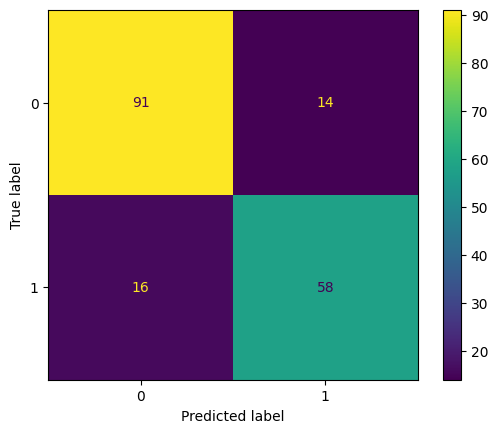

In [154]:
# Ваш код
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot()
plt.show()

In [155]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



### 7.2. Оцените точность модели:

In [156]:
# Ваш код
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.8324022346368715


## 8. Тюнинг гиперпараметров модели:

In [157]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [158]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


RandomSearchCV

In [159]:
# Ваш код
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_RandomGrid = RandomizedSearchCV(
    estimator = rf_model,
    param_distributions = param_grid,
    cv = 10,
    verbose=2,
    n_jobs = 4
  )

In [160]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [161]:
rf_RandomGrid.best_params_

{'n_estimators': 10,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

GridSearchCV

In [162]:
# Ваш код
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(
    estimator = rf_model,
    param_grid = param_grid,
    cv = 10,
    verbose=2,
    n_jobs = 4
)

In [163]:
rf_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [164]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 80}

## 9. Оценка лучшей модели:

In [165]:
# Ваш код
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.836
Test Accuracy - : 0.804


In [166]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.830
Test Accuracy - : 0.810


# Задание 2. Решите задачу из предыдущего пункта используя другие, ранее пройденные классификаторы. Сравните их точность предсказания с Random Forest

In [167]:
# Ваш код
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

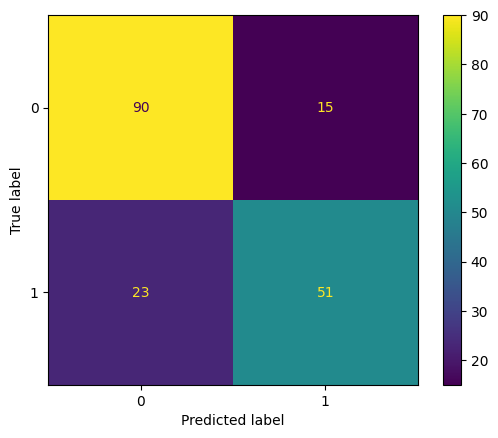

In [168]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tree)).plot()
plt.show()

In [169]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [170]:
from sklearn.linear_model import LogisticRegression
# Logidtic Regression

logistic_model=LogisticRegression(random_state=42)
logistic_model.fit(X_train,y_train)

y_pred_logistic= logistic_model.predict(X_test)

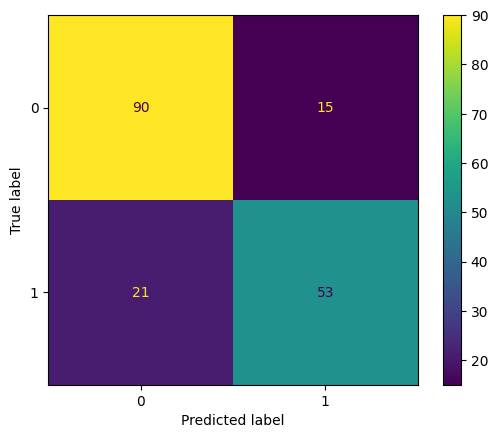

In [171]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_logistic)).plot()
plt.show()

In [172]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Деревья решений хуже справились т.к. оценка точности ниже в сравнении с Random Forest подходом.

# Задание 2.1*. Реализуйте функцию, для взаимодействия с обученной Вами моделью

* Функция должна принимать на вход обученную модель классификатора;

* После вызова функции, у пользователя через консоль запрашиваются значения признаков. При запросе значений нужно вывести пояснения о типе и диапазоне возможных значений. Также реализуйте обработку исключений;

* После ввода значений для всех признаков в консоль, выводится результат работы классификатора.

In [177]:
# Ваш код
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [183]:
# Ваш код

def kek(features, dtypes, model):
  print('Supported features:', features)
  print("Features dtypes: ", dtypes)
  print('Possible values:')
  print('Parch - [0,10] (int)')
  print('Fare - [0.0,1.0] (float)')
  print('Other features - [0,1] (int)')

  print('Classes with same postfix cant have same 1! One class contains unique value')
  print('Example data: [0, 0.2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]')

  test = {}
  for feature in features:
    test[feature]=input('Input value for feature[' + feature + ']:')


  print('Your data:', test)

  testNew = pd.DataFrame(test, index=[0])

  result = model.predict(testNew)

  print(result)

kek(
    X_test.columns.tolist(),
    X_test.dtypes,
    rf_model
  )


Supported features: ['Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Age_0-12', 'Age_13-24', 'Age_25-36', 'Age_36-48', 'Age_49-60', 'Age_61+', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8']
Features dtypes:  Parch           int64
Fare          float64
Pclass_1        int64
Pclass_2        int64
Pclass_3        int64
Sex_female      int64
Sex_male        int64
Age_0-12        int64
Age_13-24       int64
Age_25-36       int64
Age_36-48       int64
Age_49-60       int64
Age_61+         int64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
SibSp_0         int64
SibSp_1         int64
SibSp_2         int64
SibSp_3         int64
SibSp_4         int64
SibSp_5         int64
SibSp_8         int64
dtype: object
Possible values:
Parch - [0,10] (int)
Fare - [0.0,1.0] (float)
Other features - [0,1] (int)
Classes with same postfix cant have same 1! One class contains unique value


# Задание 3. Решите задачу регрессии, используя [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

* Для выполнения данного задания можете использовать **любой датасет**



In [83]:
# Ваш код

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # some plotting!
import seaborn as sns # so pretty!
from scipy import stats # I might use this
from sklearn.ensemble import RandomForestClassifier # checking if this is available
# from sklearn import cross_validation
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/content/drive/MyDrive/rfr/"]).decode("utf8"))

sample_submission.csv
test.csv
train.csv



In [85]:
# import the training data set and make sure it's in correctly...
train = pd.read_csv('/content/drive/MyDrive/rfr/train.csv')
train_original = pd.read_csv('/content/drive/MyDrive/rfr/train.csv')
test = pd.read_csv('/content/drive/MyDrive/rfr/test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [86]:
# define a function to convert an object (categorical) feature into an int feature
# 0 = most common category, highest int = least common.
def getObjectFeature(df, col, datalength=1460):
    if df[col].dtype!='object': # if it's not categorical..
        print('feature',col,'is not an object feature.')
        return df
    elif len([i for i in df[col].T.notnull() if i == True])!=datalength: # if there's missing data..
        print('feature',col,'is missing data.')
        return df
    else:
        df1 = df
        counts = df1[col].value_counts() # get the counts for each label for the feature
        df1[col] = [counts.index.tolist().index(i) for i in df1[col]] # do the conversion
        return df1 # make the new (integer) column from the conversion
# and test the function...
fcntest = getObjectFeature(train,'LotShape')
fcntest.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


<ipython-input-87-b103a6493298>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'],fit=norm);


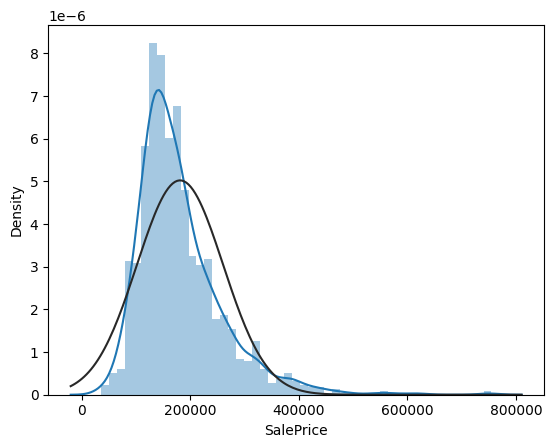

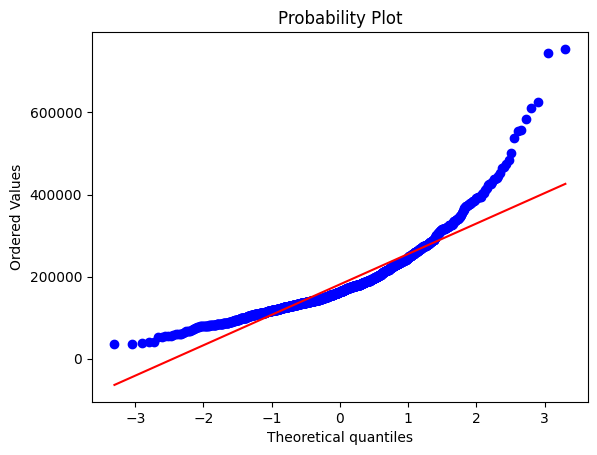

In [87]:
#histogram and normal probability plot
from scipy.stats import norm
sns.distplot(train['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

<ipython-input-88-46fc49c07994>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'],fit=norm);


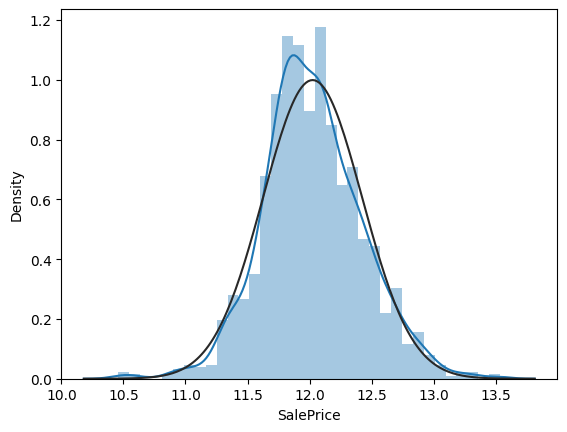

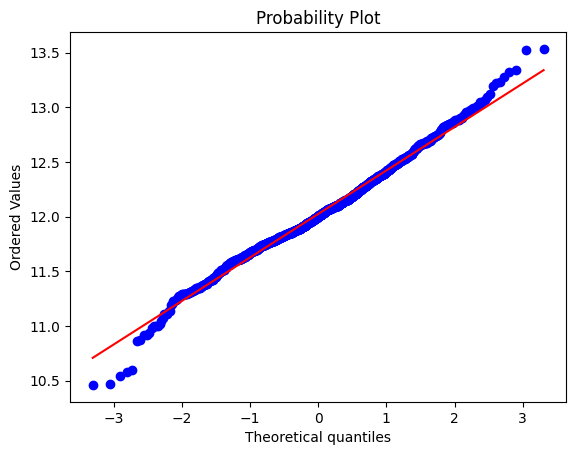

In [88]:
train['SalePrice'] = np.log(train['SalePrice'])
sns.distplot(train['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [89]:
from sklearn.tree import DecisionTreeRegressor as dtr
# define the training data X...
X = train[['MoSold','YrSold','LotArea','BedroomAbvGr']]
Y = train[['SalePrice']]
# and the data for the competition submission...
X_test = test[['MoSold','YrSold','LotArea','BedroomAbvGr']]
print(X.head())
print(Y.head())

   MoSold  YrSold  LotArea  BedroomAbvGr
0       2    2008     8450             3
1       5    2007     9600             3
2       9    2008    11250             3
3       2    2006     9550             3
4      12    2008    14260             4
   SalePrice
0  12.247694
1  12.109011
2  12.317167
3  11.849398
4  12.429216


In [90]:
# let's set up some cross-validation analysis to evaluate our model and later models...
from sklearn.model_selection import cross_val_score
# try fitting a decision tree regression model...
DTR_1 = dtr(max_depth=None) # declare the regression model form. Let the depth be default.
# DTR_1.fit(X,Y) # fit the training data
scores_dtr = cross_val_score(DTR_1, X, Y, cv=10,scoring='explained_variance') # 10-fold cross validation
print('scores for k=10 fold validation:',scores_dtr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_dtr.mean(), scores_dtr.std() * 2))

scores for k=10 fold validation: [-0.41171504 -0.3287313  -0.31985283 -0.31871802 -0.15992039 -0.6451598
 -0.62033089 -0.58462423 -1.21110422 -0.24047166]
Est. explained variance: -0.48 (+/- 0.58)


In [91]:
from sklearn.ensemble import RandomForestRegressor as rfr
estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
yt = [i for i in Y['SalePrice']] # quick pre-processing of the target
np.random.seed(11111)
for i in estimators:
    model = rfr(n_estimators=i,max_depth=None)
    scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
    print('estimators:',i)
#     print('explained variance scores for k=10 fold validation:',scores_rfr)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print('')
    mean_rfrs.append(scores_rfr.mean())
    std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
    std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting

estimators: 2
Est. explained variance: -0.16 (+/- 0.23)

estimators: 5
Est. explained variance: 0.01 (+/- 0.26)

estimators: 10
Est. explained variance: 0.10 (+/- 0.20)

estimators: 15
Est. explained variance: 0.12 (+/- 0.21)

estimators: 20
Est. explained variance: 0.15 (+/- 0.16)

estimators: 25
Est. explained variance: 0.14 (+/- 0.19)

estimators: 30
Est. explained variance: 0.13 (+/- 0.21)

estimators: 35
Est. explained variance: 0.16 (+/- 0.17)

estimators: 40
Est. explained variance: 0.15 (+/- 0.16)

estimators: 45
Est. explained variance: 0.16 (+/- 0.16)

estimators: 50
Est. explained variance: 0.15 (+/- 0.18)

estimators: 55
Est. explained variance: 0.16 (+/- 0.18)

estimators: 60
Est. explained variance: 0.16 (+/- 0.19)

estimators: 65
Est. explained variance: 0.15 (+/- 0.19)

estimators: 70
Est. explained variance: 0.16 (+/- 0.18)

estimators: 75
Est. explained variance: 0.16 (+/- 0.18)

estimators: 80
Est. explained variance: 0.16 (+/- 0.18)



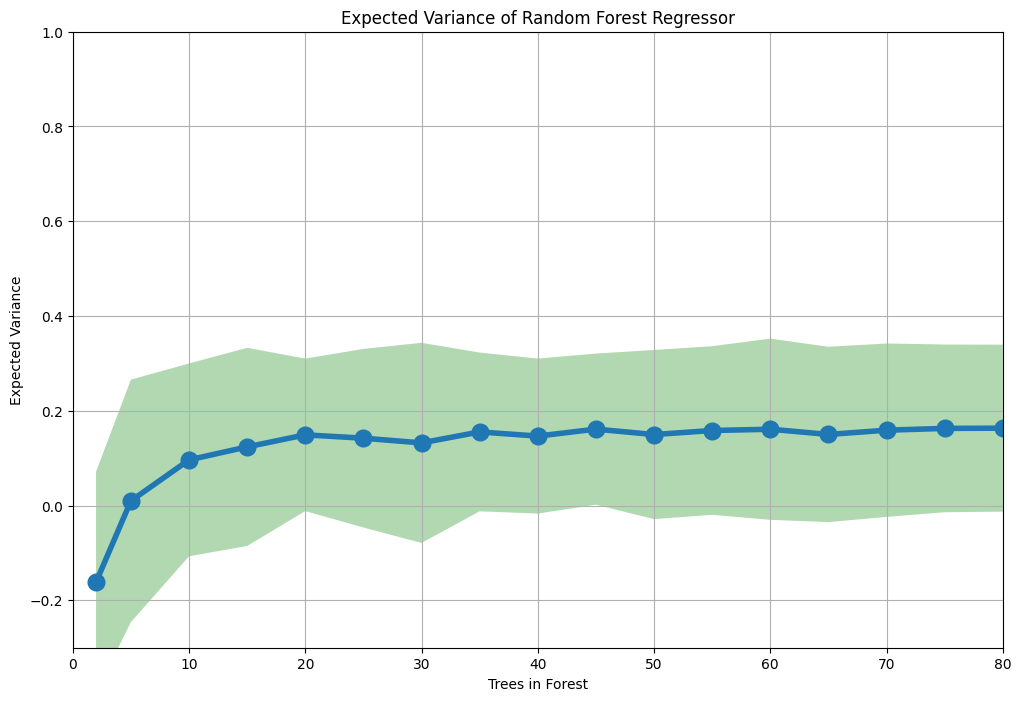

In [92]:
# and plot...
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(estimators,mean_rfrs,marker='o',
       linewidth=4,markersize=12)
ax.fill_between(estimators,std_rfrs_lower,std_rfrs_upper,
                facecolor='green',alpha=0.3,interpolate=True)
ax.set_ylim([-.3,1])
ax.set_xlim([0,80])
plt.title('Expected Variance of Random Forest Regressor')
plt.ylabel('Expected Variance')
plt.xlabel('Trees in Forest')
plt.grid()
plt.show()

In [93]:
# list all the features we want. This is still arbitrary...
included_features = ['MoSold','YrSold','LotArea','BedroomAbvGr', # original data
                    'FullBath','HalfBath','TotRmsAbvGrd', # bathrooms and total rooms
                    'YearBuilt','YearRemodAdd', # age of the house
                    'LotShape','Utilities'] # some categoricals
# define the training data X...
X = train[included_features]
Y = train[['SalePrice']]
# and the data for the competition submission...
X_test = test[included_features]
# transform categorical data if included in X...
for col in list(X):
    if X[col].dtype=='object':
        X = getObjectFeature(X, col)
X.head()

<ipython-input-86-24f150cbd581>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i) for i in df1[col]] # do the conversion


,MoSold,YrSold,LotArea,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LotShape,Utilities
0,2,2008,8450,3,2,1,8,2003,2003,0,0
1,5,2007,9600,3,2,0,6,1976,1976,0,0
2,9,2008,11250,3,2,1,6,2001,2002,1,0
3,2,2006,9550,3,1,0,7,1915,1970,1,0
4,12,2008,14260,4,2,1,9,2000,2000,1,0


In [94]:
# define the number of estimators to consider
estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
yt = [i for i in Y['SalePrice']]
np.random.seed(11111)
# for each number of estimators, fit the model and find the results for 8-fold cross validation
for i in estimators:
    model = rfr(n_estimators=i,max_depth=None)
    scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
    print('estimators:',i)
#     print('explained variance scores for k=10 fold validation:',scores_rfr)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print("")
    mean_rfrs.append(scores_rfr.mean())
    std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
    std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting

estimators: 2
Est. explained variance: 0.58 (+/- 0.17)

estimators: 5
Est. explained variance: 0.67 (+/- 0.09)

estimators: 10
Est. explained variance: 0.69 (+/- 0.10)

estimators: 15
Est. explained variance: 0.69 (+/- 0.09)

estimators: 20
Est. explained variance: 0.70 (+/- 0.09)

estimators: 25
Est. explained variance: 0.70 (+/- 0.10)

estimators: 30
Est. explained variance: 0.71 (+/- 0.08)

estimators: 35
Est. explained variance: 0.71 (+/- 0.09)

estimators: 40
Est. explained variance: 0.71 (+/- 0.10)

estimators: 45
Est. explained variance: 0.72 (+/- 0.08)

estimators: 50
Est. explained variance: 0.71 (+/- 0.09)

estimators: 55
Est. explained variance: 0.72 (+/- 0.09)

estimators: 60
Est. explained variance: 0.72 (+/- 0.10)

estimators: 65
Est. explained variance: 0.71 (+/- 0.08)

estimators: 70
Est. explained variance: 0.71 (+/- 0.09)

estimators: 75
Est. explained variance: 0.72 (+/- 0.09)

estimators: 80
Est. explained variance: 0.72 (+/- 0.09)



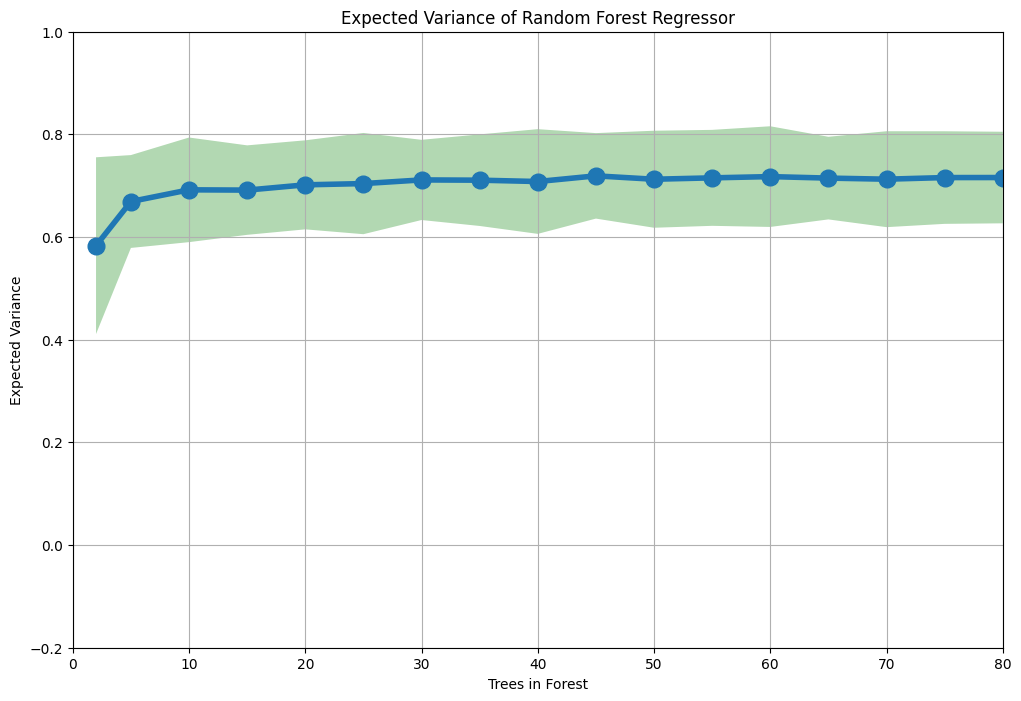

In [95]:
# and plot...
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(estimators,mean_rfrs,marker='o',
       linewidth=4,markersize=12)
ax.fill_between(estimators,std_rfrs_lower,std_rfrs_upper,
                facecolor='green',alpha=0.3,interpolate=True)
ax.set_ylim([-.2,1])
ax.set_xlim([0,80])
plt.title('Expected Variance of Random Forest Regressor')
plt.ylabel('Expected Variance')
plt.xlabel('Trees in Forest')
plt.grid()
plt.show()